<h1><center>AISC2000 - Group Trees - MECE Table </center></h1>

| **STUDENT NAME** | **TASK** | **DESCRIPTION** |
|:---:|:---:|:---:|
|| **DATA PREPARATION** ||
| MUKUL GARG | Exploratory Data Analysis (EDA) | Initial data exploration, summary statistics, and visualization |
| GOKUL KRISHNA POURNAMI GOPI | Preprocessing and Data Cleaning | Handling missing values, data formatting, and preparation for analysis |
| OBIANUJU NONYEREM ANUMA | Feature Engineering | Creating new features, encoding categorical variables, and feature scaling |
|| **MODEL BUILDING** ||
| APARNA JAYAKUMAR RESMI | Decision Tree Model | Building and training the Decision Tree model |
| KANIKA | Random Forest Model | Building and training the Random Forest model |
| CLIFFORD ADDISON | AdaBoost Model | Building and training the AdaBoost model |
| AMRUTH RAJ MANCHIKANTI | XGBoost Model | Building and training the XGBoost model |
|| **MODEL EVALUATION** ||
| SUBHASH PAVAN CHAKRAVARTHY SOMAROUTHU | Feature Importance Analysis | Analyzing feature importance with Decision Tree and Random Forest |
| ABDULLAH IFTEQAR MOHAMMED | LIME/SHAP Comparison | Comparing feature importance using LIME and SHAP |
||**HYPERPARAMETER TUNING, DEPLOYMENT AND MAINTENANCE**||
| WATAPOTHA KOSINNAGE CHALITHYA SANGEETH KUMARASINGHE | GitHub Maintenance and Project Deployment | Deploying models and maintaining project on GitHub using Flask |

In [1]:
!pip install wordcloud

In [2]:
# Import all libraries
import pandas as pd
import numpy as np
import json
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# import researchpy as rp
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### 1. Load the Data
- The Yelp dataset is in **JSON** format. We will load the data and convert it to a **DataFrame** for easier manipulation.

In [3]:
# Load Yelp business data
business_data = pd.read_json('./yelp_academic_dataset_business.json', lines=True)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
business_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [6]:
business_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [7]:
# Rename name to business name
business_data.rename(columns={'name': 'business_name'}, inplace=True)

In [8]:
# Rename stars and review_count to business_rating_stars and business_review_count
business_data.rename(columns={'stars': 'business_rating_stars', 'review_count': 'business_review_count'}, inplace=True)

In [9]:
# Load Yelp checkin data
checkin_data = pd.read_json('./yelp_academic_dataset_checkin.json', lines=True)

In [10]:
checkin_data

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,"2013-03-23 16:22:47, 2013-04-07 02:03:12, 2013..."
131926,zznZqH9CiAznbkV6fXyHWA,2021-06-12 01:16:12
131927,zzu6_r3DxBJuXcjnOYVdTw,"2011-05-24 01:35:13, 2012-01-01 23:44:33, 2012..."
131928,zzw66H6hVjXQEt0Js3Mo4A,"2016-12-03 23:33:26, 2018-12-02 19:08:45"


In [11]:
# Rename 'date' column to 'checkin_date'
checkin_data.rename(columns={'date': 'checkin_date'}, inplace=True)
checkin_data.head()

,business_id,checkin_date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [12]:
# Split 'checkin_date' into multiple dates
checkin_data['checkin_date'] = checkin_data['checkin_date'].str.split(', ')

# Convert 'checkin_date' into separate rows
checkin_data = checkin_data.explode('checkin_date')

# Group by 'business_id' and count total checkins
checkin_counts = checkin_data.groupby('business_id').size().reset_index(name='total_checkins')

checkin_counts.head()

,business_id,total_checkins
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26


In [13]:
# Merge this information back into the business DataFrame
business_data = business_data.merge(checkin_counts, on='business_id', how='left')

# Fill NaN values in total_checkins with 0 (for businesses with no check-ins)
business_data['total_checkins'] = business_data['total_checkins'].fillna(0)

In [14]:
business_data.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,business_rating_stars,business_review_count,is_open,attributes,categories,hours,total_checkins
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,1.0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",15.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",401.0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",335.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",14.0


In [15]:
# Load Yelp tip data
tip_data = pd.read_json('./yelp_academic_dataset_tip.json', lines=True)

In [16]:
tip_data.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [17]:
# Rename date to tip date
tip_data.rename(columns={'date': 'tip_date'}, inplace=True)

In [18]:
# Rename text to tip reason
tip_data.rename(columns={'text': 'tip_reason'}, inplace=True)

In [19]:
# Calculating total tips received for each business
tip_counts = tip_data.groupby('business_id').size().reset_index(name='total_tips')

# Merge with business data
business_data = business_data.merge(tip_counts, on='business_id', how='left')

# Fill NaN values for businesses with no tips
business_data['total_tips'] = business_data['total_tips'].fillna(0)

In [20]:
business_data.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,business_rating_stars,business_review_count,is_open,attributes,categories,hours,total_checkins,total_tips
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,1.0,0.0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",15.0,1.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",401.0,8.0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",335.0,10.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",14.0,1.0


In [21]:
# Load Yelp user data
user_data = pd.read_json('./yelp_academic_dataset_user.json', lines=True,nrows=100000)

In [22]:
user_data.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0


In [23]:
# Load Yelp review data
review_data = pd.read_json('./yelp_academic_dataset_review.json', lines=True, nrows=100000)

In [24]:
review_data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [25]:
#  review-level metrics by business_id
review_aggregates = review_data.groupby('business_id').agg({
    'stars': 'mean',  
    'review_id': 'count',  
    'useful': 'sum',  
    'funny': 'sum',   
    'cool': 'sum'     
}).reset_index()

review_aggregates.columns = ['business_id', 'avg_star_rating', 'total_reviews', 'total_useful_votes', 'total_funny_votes', 'total_cool_votes']

review_aggregates.head()

,business_id,avg_star_rating,total_reviews,total_useful_votes,total_funny_votes,total_cool_votes
0,--ZVrH2X2QXBFdCilbirsw,4.800000,10,4,2,4
1,--_9CAxgfXZmoFdNIRrhHA,3.500000,2,5,3,3
2,-02xFuruu85XmDn2xiynJw,4.888889,9,3,1,1
3,-0Ym1Wg3bXd_TDz8JtvOQg,4.285714,7,0,0,0
4,-0fvhILrC9UsQ6gLNpZlTQ,5.000000,2,0,0,0


In [26]:
# Merging review data with business data
merged_data = pd.merge(business_data, review_aggregates, on='business_id', how='left')

#businesses with no reviews
merged_data.fillna(0, inplace=True)

merged_data.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,business_rating_stars,business_review_count,is_open,attributes,categories,hours,total_checkins,total_tips,avg_star_rating,total_reviews,total_useful_votes,total_funny_votes,total_cool_votes
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",0,1.0,0.0,5.000000,1.0,3.0,2.0,1.0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",15.0,1.0,4.333333,3.0,1.0,0.0,1.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",401.0,8.0,4.000000,2.0,1.0,0.0,0.0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",335.0,10.0,4.058824,17.0,20.0,7.0,24.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",14.0,1.0,0.000000,0.0,0.0,0.0,0.0


In [27]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   business_id            150346 non-null  object 
 1   business_name          150346 non-null  object 
 2   address                150346 non-null  object 
 3   city                   150346 non-null  object 
 4   state                  150346 non-null  object 
 5   postal_code            150346 non-null  object 
 6   latitude               150346 non-null  float64
 7   longitude              150346 non-null  float64
 8   business_rating_stars  150346 non-null  float64
 9   business_review_count  150346 non-null  int64  
 10  is_open                150346 non-null  int64  
 11  attributes             150346 non-null  object 
 12  categories             150346 non-null  object 
 13  hours                  150346 non-null  object 
 14  total_checkins         150346 non-nu

In [28]:
# Expanding the 'attributes' column into multiple columns
attributes_df = pd.json_normalize(merged_data['attributes'])

attributes_df.head()

,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,False,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",NaN,NaN,False,NaN,NaN,NaN,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#merging back the data
merged_data = pd.concat([merged_data.drop(columns=['attributes']), attributes_df], axis=1)

merged_data.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,business_rating_stars,business_review_count,is_open,categories,hours,total_checkins,total_tips,avg_star_rating,total_reviews,total_useful_votes,total_funny_votes,total_cool_votes,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",0,1.0,0.0,5.000000,1.0,3.0,2.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",15.0,1.0,4.333333,3.0,1.0,0.0,1.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",401.0,8.0,4.000000,2.0,1.0,0.0,0.0,False,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",335.0,10.0,4.058824,17.0,20.0,7.0,24.0,False,False,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",NaN,NaN,False,NaN,NaN,NaN,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",14.0,1.0,0.000000,0.0,0.0,0.0,0.0,NaN,True,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
merged_data.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,business_rating_stars,business_review_count,is_open,categories,hours,total_checkins,total_tips,avg_star_rating,total_reviews,total_useful_votes,total_funny_votes,total_cool_votes,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,BusinessParking,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",0,1.0,0.0,5.000000,1.0,3.0,2.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",15.0,1.0,4.333333,3.0,1.0,0.0,1.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",401.0,8.0,4.000000,2.0,1.0,0.0,0.0,False,True,True,2,False,False,False,False,u'no',"{'garage': False, 'street': False, 'validated'...",True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",335.0,10.0,4.058824,17.0,20.0,7.0,24.0,False,False,True,1,NaN,True,False,True,u'free',"{'garage': False, 'street': True, 'validated':...",NaN,NaN,False,NaN,NaN,NaN,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",14.0,1.0,0.000000,0.0,0.0,0.0,0.0,NaN,True,True,NaN,NaN,True,NaN,False,NaN,"{'garage': None, 'street': None, 'validated': ...",True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# replacing nan values with empty dictionary
merged_data['BusinessParking'] = merged_data['BusinessParking'].apply(lambda x: {} if pd.isna(x) else x)

In [32]:
merged_data['BusinessParking']

0                                                        {}
1                                                        {}
2         {'garage': False, 'street': False, 'validated'...
3         {'garage': False, 'street': True, 'validated':...
4         {'garage': None, 'street': None, 'validated': ...
                                ...                        
150341                                                   {}
150342    {'garage': False, 'street': False, 'validated'...
150343                                                   {}
150344    {'garage': False, 'street': False, 'validated'...
150345    {'garage': False, 'street': False, 'validated'...
Name: BusinessParking, Length: 150346, dtype: object

In [33]:
import ast

def convert_to_dict(value):
    if isinstance(value, dict):
        return value 
    elif isinstance(value, str):
        try:
           
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
          
            return {}
    else:
     
        return {}


merged_data['BusinessParking'] = merged_data['BusinessParking'].apply(convert_to_dict)

In [34]:
parking_df = pd.json_normalize(merged_data['BusinessParking'])

parking_df.columns = [f'BusinessParking_{col}' for col in parking_df.columns]

parking_df.head()

,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,False,False,False,True,False
3,False,True,False,False,False
4,None,None,None,True,False


In [35]:
merged_data = pd.concat([merged_data.drop(columns=['BusinessParking']), parking_df], axis=1)


In [36]:
merged_data.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,business_rating_stars,business_review_count,is_open,categories,hours,total_checkins,total_tips,avg_star_rating,total_reviews,total_useful_votes,total_funny_votes,total_cool_votes,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",0,1.0,0.0,5.000000,1.0,3.0,2.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",15.0,1.0,4.333333,3.0,1.0,0.0,1.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",401.0,8.0,4.000000,2.0,1.0,0.0,0.0,False,True,True,2,False,False,False,False,u'no',True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",335.0,10.0,4.058824,17.0,20.0,7.0,24.0,False,False,True,1,NaN,True,False,True,u'free',NaN,NaN,False,NaN,NaN,NaN,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",14.0,1.0,0.000000,0.0,0.0,0.0,0.0,NaN,True,True,NaN,NaN,True,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,True,False


In [37]:
final_datasset=merged_data.copy()

In [39]:
# criteria

# 1. High rating (3.0 or more stars)
high_rating = (merged_data['business_rating_stars'] >= 3.0).astype(int)

# 2. High review count (more than 50reviews)
high_review_count = (merged_data['business_review_count'] > 30).astype(int)

# 3. High number of check-ins (more than 30 check-ins)
high_checkins = (merged_data['total_checkins'] > 30).astype(int)

# 4. Business accepts credit cards
accepts_credit_cards = (merged_data['BusinessAcceptsCreditCards'] == 'True').astype(int)



# 5. Business has parking (any parking option being 'True')
has_parking = (merged_data[['BusinessParking_garage', 'BusinessParking_street', 
                            'BusinessParking_validated', 'BusinessParking_lot', 
                            'BusinessParking_valet']].fillna('False') == 'True').any(axis=1).astype(int)

# 6. Good for groups (RestaurantsGoodForGroups is 'True')
good_for_groups = (merged_data['RestaurantsGoodForGroups'] == 'True').astype(int)

# 7. Business has bike parking (BikeParking is 'True')
has_bike_parking = (merged_data['BikeParking'] == 'True').astype(int)

# 8. Business is open (is_open == 1)
is_open = (merged_data['is_open'] == 1).astype(int)

# Combine the criteria to determine if a business is validated
# Consider a business validated if it meets at least 5 out of the 8 criteria
merged_data['validated'] = (high_rating + high_review_count + high_checkins + accepts_credit_cards  
                         + has_parking +  good_for_groups + has_bike_parking+is_open) >= 5

# Convert the validated column to integer (0 or 1)
merged_data['validated'] = merged_data['validated'].astype(int)

# Check the distribution of validated vs. not validated businesses
print(merged_data['validated'].value_counts())

# View the first few rows to see the new 'validated' column
print(merged_data[['business_id', 'business_name', 'validated']].head())


validated
0    108231
1     42115
Name: count, dtype: int64
              business_id             business_name  validated
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ          0
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store          0
2  tUFrWirKiKi_TAnsVWINQQ                    Target          0
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries          1
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery          0


In [40]:
final_data=merged_data.copy()

In [41]:
final_data.head()

,business_id,business_name,address,city,state,postal_code,latitude,longitude,business_rating_stars,business_review_count,is_open,categories,hours,total_checkins,total_tips,avg_star_rating,total_reviews,total_useful_votes,total_funny_votes,total_cool_votes,ByAppointmentOnly,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,CoatCheck,RestaurantsTakeOut,RestaurantsDelivery,Caters,WiFi,WheelchairAccessible,HappyHour,OutdoorSeating,HasTV,RestaurantsReservations,DogsAllowed,Alcohol,GoodForKids,RestaurantsAttire,Ambience,RestaurantsTableService,RestaurantsGoodForGroups,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,AcceptsInsurance,BestNights,BYOB,Corkage,BYOBCorkage,HairSpecializesIn,Open24Hours,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,validated
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop...",0,1.0,0.0,5.000000,1.0,3.0,2.0,1.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",15.0,1.0,4.333333,3.0,1.0,0.0,1.0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",401.0,8.0,4.000000,2.0,1.0,0.0,0.0,False,True,True,2,False,False,False,False,u'no',True,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",335.0,10.0,4.058824,17.0,20.0,7.0,24.0,False,False,True,1,NaN,True,False,True,u'free',NaN,NaN,False,NaN,NaN,NaN,u'none',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False,1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",14.0,1.0,0.000000,0.0,0.0,0.0,0.0,NaN,True,True,NaN,NaN,True,NaN,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,True,False,0


In [44]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 64 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_id                 150346 non-null  object 
 1   business_name               150346 non-null  object 
 2   address                     150346 non-null  object 
 3   city                        150346 non-null  object 
 4   state                       150346 non-null  object 
 5   postal_code                 150346 non-null  object 
 6   latitude                    150346 non-null  float64
 7   longitude                   150346 non-null  float64
 8   business_rating_stars       150346 non-null  float64
 9   business_review_count       150346 non-null  int64  
 10  is_open                     150346 non-null  int64  
 11  categories                  150346 non-null  object 
 12  hours                       150346 non-null  object 
 13  total_checkins

In [45]:
merged_data.describe()

,latitude,longitude,business_rating_stars,business_review_count,is_open,total_checkins,total_tips,avg_star_rating,total_reviews,total_useful_votes,total_funny_votes,total_cool_votes,validated
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000,150346.000000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615,88.840907,6.045488,0.246640,0.665132,0.597941,0.171059,0.230821,0.280121
std,5.872759,14.918502,0.974421,121.120136,0.40286,392.157697,18.366164,0.973704,6.832844,5.857882,2.010764,2.635560,0.449059
min,27.555127,-120.095137,1.000000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000,58.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000,52144.000000,2571.000000,5.000000,950.000000,611.000000,231.000000,284.000000,1.000000


In [46]:
# Filter merged_data to only include specific columns and display the result
columns_to_keep = [
    'business_name', 'business_rating_stars', 'business_review_count', 'total_checkins', 
    'BusinessAcceptsCreditCards', 'BusinessParking_garage', 'BusinessParking_street', 
    'BusinessParking_validated', 'BusinessParking_lot', 'BusinessParking_valet', 
    'RestaurantsGoodForGroups', 'BikeParking', 'is_open', 'validated'
]

merged_data = merged_data[columns_to_keep]

merged_data.head()

,business_name,business_rating_stars,business_review_count,total_checkins,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,RestaurantsGoodForGroups,BikeParking,is_open,validated
0,"Abby Rappoport, LAC, CMQ",5.0,7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,The UPS Store,3.0,15,15.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,Target,3.5,22,401.0,True,False,False,False,True,False,NaN,True,0,0
3,St Honore Pastries,4.0,80,335.0,False,False,True,False,False,False,NaN,True,1,1
4,Perkiomen Valley Brewery,4.5,13,14.0,True,None,None,None,True,False,NaN,True,1,0


In [47]:
dataset_with_target=merged_data.copy()
dataset_with_target.to_csv('dataset_with_target.csv', index=False)

### Data preproccessing

In [48]:
# shape
dataset_with_target.shape

(150346, 14)

In [49]:
# Check info on the data
dataset_with_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_name               150346 non-null  object 
 1   business_rating_stars       150346 non-null  float64
 2   business_review_count       150346 non-null  int64  
 3   total_checkins              150346 non-null  float64
 4   BusinessAcceptsCreditCards  119765 non-null  object 
 5   BusinessParking_garage      86885 non-null   object 
 6   BusinessParking_street      85474 non-null   object 
 7   BusinessParking_validated   86654 non-null   object 
 8   BusinessParking_lot         86516 non-null   object 
 9   BusinessParking_valet       88795 non-null   object 
 10  RestaurantsGoodForGroups    44170 non-null   object 
 11  BikeParking                 72638 non-null   object 
 12  is_open                     150346 non-null  int64  
 13  validated     

In [50]:
# Check for missing values
dataset_with_target.isnull().sum()

business_name                      0
business_rating_stars              0
business_review_count              0
total_checkins                     0
BusinessAcceptsCreditCards     30581
BusinessParking_garage         63461
BusinessParking_street         64872
BusinessParking_validated      63692
BusinessParking_lot            63830
BusinessParking_valet          61551
RestaurantsGoodForGroups      106176
BikeParking                    77708
is_open                            0
validated                          0
dtype: int64

In [51]:
# Null value treatment
dataset_with_target['BusinessAcceptsCreditCards'].fillna('False', inplace=True)
dataset_with_target['BusinessParking_garage'].fillna('False', inplace=True)
dataset_with_target['BusinessParking_street'].fillna('False', inplace=True)
dataset_with_target['BusinessParking_validated'].fillna('False', inplace=True)
dataset_with_target['BusinessParking_lot'].fillna('False', inplace=True)
dataset_with_target['BusinessParking_valet'].fillna('False', inplace=True)

dataset_with_target['BikeParking'].fillna('False', inplace=True)


# Now check for missing values again
print(dataset_with_target.isna().sum())


business_name                      0
business_rating_stars              0
business_review_count              0
total_checkins                     0
BusinessAcceptsCreditCards         0
BusinessParking_garage             0
BusinessParking_street             0
BusinessParking_validated          0
BusinessParking_lot                0
BusinessParking_valet              0
RestaurantsGoodForGroups      106176
BikeParking                        0
is_open                            0
validated                          0
dtype: int64


In [52]:
# Dropping the RestaurantsGoodForGroups column because of more null values
dataset_with_target = dataset_with_target.drop('RestaurantsGoodForGroups', axis=1)

In [53]:
dataset_with_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   business_name               150346 non-null  object 
 1   business_rating_stars       150346 non-null  float64
 2   business_review_count       150346 non-null  int64  
 3   total_checkins              150346 non-null  float64
 4   BusinessAcceptsCreditCards  150346 non-null  object 
 5   BusinessParking_garage      150346 non-null  object 
 6   BusinessParking_street      150346 non-null  object 
 7   BusinessParking_validated   150346 non-null  object 
 8   BusinessParking_lot         150346 non-null  object 
 9   BusinessParking_valet       150346 non-null  object 
 10  BikeParking                 150346 non-null  object 
 11  is_open                     150346 non-null  int64  
 12  validated                   150346 non-null  int32  
dtypes: float64(2),

In [54]:
# Display all counts in the Dataframe
for i in dataset_with_target.columns:
    print(dataset_with_target[i].value_counts())

business_name
Starbucks                  724
McDonald's                 703
Dunkin'                    510
Subway                     459
Taco Bell                  365
                          ... 
San Roque Florist            1
Perfect Taste Grill          1
il Fustino                   1
Chong's Oriental Market      1
Sic Ink                      1
Name: count, Length: 114117, dtype: int64
business_rating_stars
4.0    31125
4.5    27181
3.5    26519
3.0    18453
5.0    16307
2.5    14316
2.0     9527
1.5     4932
1.0     1986
Name: count, dtype: int64
business_review_count
5       14921
6       11673
7        9594
8        8040
9        6875
        ...  
2417        1
1001        1
2473        1
1583        1
754         1
Name: count, Length: 1158, dtype: int64
total_checkins
0.0       18416
1.0        9611
2.0        7255
3.0        5866
4.0        5080
          ...  
3784.0        1
2179.0        1
1601.0        1
3074.0        1
1767.0        1
Name: count, Length: 2214, dtyp

In [55]:
# Separating the target variable validated into one DataFrame
target_variable = dataset_with_target[['validated']]

# feature columns 
features = dataset_with_target.drop(columns=['business_name', 'validated'])

features.head()

,business_rating_stars,business_review_count,total_checkins,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,BikeParking,is_open
0,5.0,7,1.0,False,False,False,False,False,False,False,0
1,3.0,15,15.0,True,False,False,False,False,False,False,1
2,3.5,22,401.0,True,False,False,False,True,False,True,0
3,4.0,80,335.0,False,False,True,False,False,False,True,1
4,4.5,13,14.0,True,False,False,False,True,False,True,1


# Data split

In [56]:
# Splitting the features and target variable
x = features
y = target_variable 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training features shape:", x_train.shape)
print("Testing features shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (120276, 11)
Testing features shape: (30070, 11)
Training labels shape: (120276, 1)
Testing labels shape: (30070, 1)


In [58]:
for i in dataset_with_target.columns:
    print(dataset_with_target[i].value_counts())
    

business_name
Starbucks                  724
McDonald's                 703
Dunkin'                    510
Subway                     459
Taco Bell                  365
                          ... 
San Roque Florist            1
Perfect Taste Grill          1
il Fustino                   1
Chong's Oriental Market      1
Sic Ink                      1
Name: count, Length: 114117, dtype: int64
business_rating_stars
4.0    31125
4.5    27181
3.5    26519
3.0    18453
5.0    16307
2.5    14316
2.0     9527
1.5     4932
1.0     1986
Name: count, dtype: int64
business_review_count
5       14921
6       11673
7        9594
8        8040
9        6875
        ...  
2417        1
1001        1
2473        1
1583        1
754         1
Name: count, Length: 1158, dtype: int64
total_checkins
0.0       18416
1.0        9611
2.0        7255
3.0        5866
4.0        5080
          ...  
3784.0        1
2179.0        1
1601.0        1
3074.0        1
1767.0        1
Name: count, Length: 2214, dtyp

In [59]:
# Replacing 'None' with 'False' in BikeParking and BusinessAcceptsCreditCards columns
x_train['BikeParking'] = x_train['BikeParking'].replace('None', 'False')
x_test['BikeParking'] = x_test['BikeParking'].replace('None', 'False')

x_train['BusinessAcceptsCreditCards'] = x_train['BusinessAcceptsCreditCards'].replace('None', 'False')
x_test['BusinessAcceptsCreditCards'] = x_test['BusinessAcceptsCreditCards'].replace('None', 'False')

# Categorical Encoding

In [60]:
from sklearn.preprocessing import OneHotEncoder


columns_to_encode = [
    'BusinessAcceptsCreditCards', 'BusinessParking_garage', 'BusinessParking_street',
    'BusinessParking_validated', 'BusinessParking_lot', 'BusinessParking_valet', 
    'BikeParking','business_rating_stars'
]


x_train[columns_to_encode] = x_train[columns_to_encode].astype(str)
x_test[columns_to_encode] = x_test[columns_to_encode].astype(str)

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')


encoded_train = ohe.fit_transform(x_train[columns_to_encode])
encoded_test = ohe.transform(x_test[columns_to_encode])


encoded_train_df = pd.DataFrame(encoded_train, columns=ohe.get_feature_names_out(columns_to_encode))
encoded_test_df = pd.DataFrame(encoded_test, columns=ohe.get_feature_names_out(columns_to_encode))

x_train_encoded = pd.concat([x_train.reset_index(drop=True).drop(columns_to_encode, axis=1), encoded_train_df], axis=1)
x_test_encoded = pd.concat([x_test.reset_index(drop=True).drop(columns_to_encode, axis=1), encoded_test_df], axis=1)


x_train_encoded.head()


,business_review_count,total_checkins,is_open,BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_True,BusinessParking_garage_False,BusinessParking_garage_True,BusinessParking_street_False,BusinessParking_street_True,BusinessParking_validated_False,BusinessParking_validated_True,BusinessParking_lot_False,BusinessParking_lot_True,BusinessParking_valet_False,BusinessParking_valet_True,BikeParking_False,BikeParking_True,business_rating_stars_1.0,business_rating_stars_1.5,business_rating_stars_2.0,business_rating_stars_2.5,business_rating_stars_3.0,business_rating_stars_3.5,business_rating_stars_4.0,business_rating_stars_4.5,business_rating_stars_5.0
0,7,6.0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25,40.0,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,9,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,2.0,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,10,2.0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


columns_to_standardize = ['business_review_count', 'total_checkins']

x_train_encoded[columns_to_standardize] = scaler.fit_transform(x_train_encoded[columns_to_standardize])
x_test_encoded[columns_to_standardize] = scaler.transform(x_test_encoded[columns_to_standardize])

x_train_encoded.head()

,business_review_count,total_checkins,is_open,BusinessAcceptsCreditCards_False,BusinessAcceptsCreditCards_True,BusinessParking_garage_False,BusinessParking_garage_True,BusinessParking_street_False,BusinessParking_street_True,BusinessParking_validated_False,BusinessParking_validated_True,BusinessParking_lot_False,BusinessParking_lot_True,BusinessParking_valet_False,BusinessParking_valet_True,BikeParking_False,BikeParking_True,business_rating_stars_1.0,business_rating_stars_1.5,business_rating_stars_2.0,business_rating_stars_2.5,business_rating_stars_3.0,business_rating_stars_3.5,business_rating_stars_4.0,business_rating_stars_4.5,business_rating_stars_5.0
0,-0.317961,-0.214133,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.165970,-0.125662,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.301073,-0.229746,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.326405,-0.224542,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.292629,-0.224542,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [62]:
# Saving the datasets as CSV files for future use
x_train_encoded.to_csv('x_train_encoded.csv', index=False)
x_test_encoded.to_csv('x_test_encoded.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

## Decision Tree

In [63]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_encoded, y_train)

y_train_pred = dt_model.predict(x_train_encoded)
y_test_pred = dt_model.predict(x_test_encoded)

recall for train data is 0.987
recall for test data is 0.926
precision for train data is 0.999
precision for test data is 0.923
accuracy for train data is 0.996
accuracy for test data is 0.958
The f1 score is 0.925
The AUC score is 0.95.

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21645
           1       0.92      0.93      0.92      8425

    accuracy                           0.96     30070
   macro avg       0.95      0.95      0.95     30070
weighted avg       0.96      0.96      0.96     30070



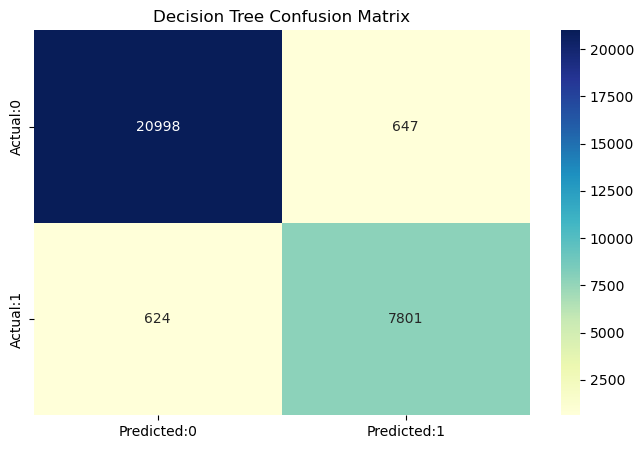


Confusion Matrix:
[[20998   647]
 [  624  7801]]


In [64]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Recall 
train_recall_dt = recall_score(y_train, y_train_pred)
test_recall_dt = recall_score(y_test, y_test_pred)
print(f"recall for train data is {round(train_recall_dt, 3)}")
print(f"recall for test data is {round(test_recall_dt, 3)}")

# Precision
train_precision_dt = round(precision_score(y_train, y_train_pred), 3)
test_precision_dt = round(precision_score(y_test, y_test_pred), 3)
print(f"precision for train data is {round(train_precision_dt, 3)}")
print(f"precision for test data is {round(test_precision_dt, 3)}")

# Accuracy
train_accuracy_dt = accuracy_score(y_train, y_train_pred)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
print(f"accuracy for train data is {round(train_accuracy_dt, 3)}")
print(f"accuracy for test data is {round(test_accuracy_dt, 3)}")

# f1 score 
f1_dt = f1_score(y_test, y_test_pred)
print(f'The f1 score is {round(f1_dt, 3)}')

probs_dt = dt_model.predict_proba(x_test_encoded)

probs_dt = probs_dt[:, 1]

auc_dt = roc_auc_score(y_test, probs_dt)
print(f"The AUC score is {round(auc_dt, 3)}.")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
conf_matrix_dt = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Decision Tree Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(cm)

# Intrepretation:

1.The model has very high precision, recall, and accuracy. It generalizes well to the test data, and the AUC score of 0.95 suggests that it can effectively distinguish between validated and non-validated businesses.
2. however there is a slight drop in performance from the training to the test set, which suggests a small amount of overfitting. 

We can fine tune the model and reduce overfitting.


In [65]:
y_train

,validated
78491,0
19791,1
79705,0
49763,0
72601,0
...,...
119879,0
103694,1
131932,0
146867,0


### Build the Random Forest Model
- Building a Random Forest model to predict business validation.

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_encoded, y_train.values.ravel())

y_train_pred_rf = rf_model.predict(x_train_encoded)
y_test_pred_rf = rf_model.predict(x_test_encoded)

recall for train data is 0.989
recall for test data is 0.931
precision for train data is 0.997
precision for test data is 0.943
accuracy for train data is 0.996
accuracy for test data is 0.965
The f1 score is 0.937
The AUC score is 0.991.

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     21645
           1       0.94      0.93      0.94      8425

    accuracy                           0.96     30070
   macro avg       0.96      0.95      0.96     30070
weighted avg       0.96      0.96      0.96     30070



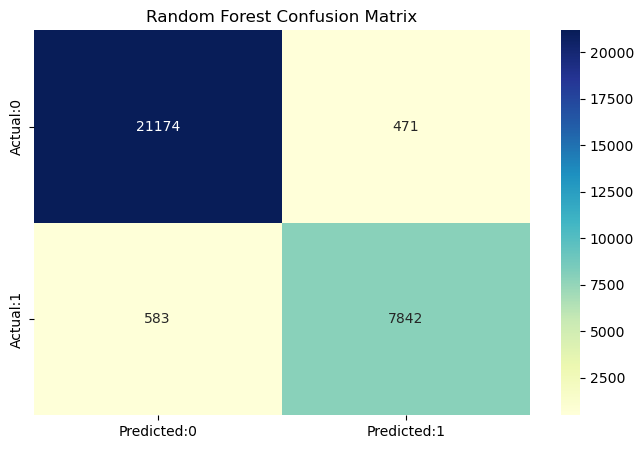


Confusion Matrix:
[[21174   471]
 [  583  7842]]


In [68]:
# Recall Score for train and test
train_recall_rf = recall_score(y_train, y_train_pred_rf)
test_recall_rf = recall_score(y_test, y_test_pred_rf)
print(f"recall for train data is {round(train_recall_rf, 3)}")
print(f"recall for test data is {round(test_recall_rf, 3)}")

# precision of the model
train_precision_rf = round(precision_score(y_train, y_train_pred_rf), 3)
test_precision_rf = round(precision_score(y_test, y_test_pred_rf), 3)
print(f"precision for train data is {round(train_precision_rf, 3)}")
print(f"precision for test data is {round(test_precision_rf, 3)}")

#  accuracy of the model
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"accuracy for train data is {round(train_accuracy_rf, 3)}")
print(f"accuracy for test data is {round(test_accuracy_rf, 3)}")

# f1 score for Random Forest
f1_rf = f1_score(y_test, y_test_pred_rf)
print(f'The f1 score is {round(f1_rf, 3)}')

# ROC curve and AUC
probs_rf = rf_model.predict_proba(x_test_encoded)

probs_rf = probs_rf[:, 1]
#  AUC
auc_rf = roc_auc_score(y_test, probs_rf)
print(f"The AUC score is {round(auc_rf, 3)}.")


print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_rf))


cm_rf = confusion_matrix(y_test, y_test_pred_rf)
conf_matrix_rf = pd.DataFrame(data=cm_rf, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="YlGnBu")
plt.title('Random Forest Confusion Matrix')
plt.show()


print("\nConfusion Matrix:")
print(cm_rf)

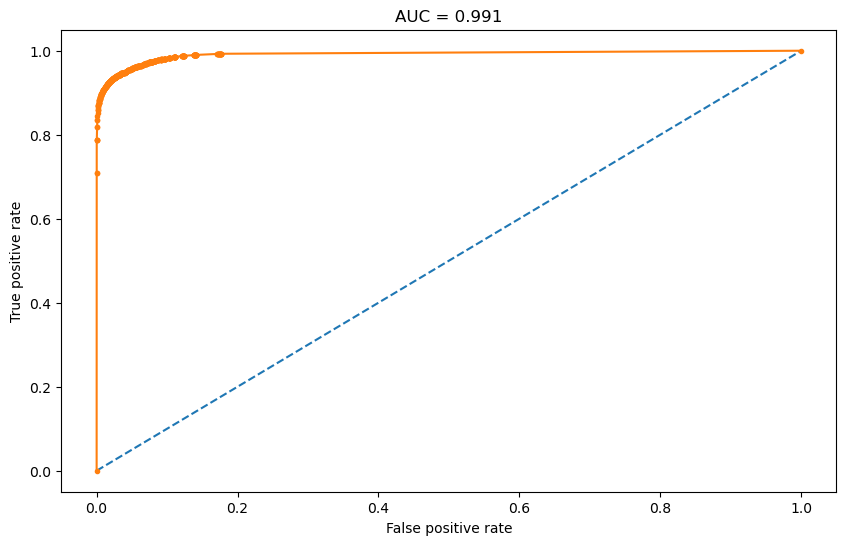

KS statistic: 0.9115622538767939


In [69]:
#  roc curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, probs_rf)


plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(auc_rf,3)}")
plt.show()

#KS (Kolmogorov-Smirnov) Statistic:
from sklearn import metrics
def ks_statistic_rf(y_true, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
    return max(tpr - fpr)

ks_rf = ks_statistic_rf(y_test, rf_model.predict_proba(x_test_encoded)[:, 1])

print("KS statistic:", ks_rf)


# Intrepretaion

1.The model has strong precision, recall, accuracy, and F1-scores across both training and test sets. It generalizes well, with only slight drops in performance from training to test data.
2.AUC of 0.991: The model can almost perfectly distinguish between validated and non-validated businesses.

tuning the model is not needed.

# 7. Build AdaBoost and XGBoost Models
- Building AdaBoost and XGBoost models for comparison.

# AdaBoost Model

In [70]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(x_train_encoded, y_train.values.ravel())  

y_train_pred_ada = ada_model.predict(x_train_encoded)
y_test_pred_ada = ada_model.predict(x_test_encoded)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


recall for train data is 0.919
recall for test data is 0.921
precision for train data is 0.959
precision for test data is 0.959
accuracy for train data is 0.966
accuracy for test data is 0.967
The f1 score is 0.939
The AUC score is 0.995.

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     21645
           1       0.96      0.92      0.94      8425

    accuracy                           0.97     30070
   macro avg       0.96      0.95      0.96     30070
weighted avg       0.97      0.97      0.97     30070



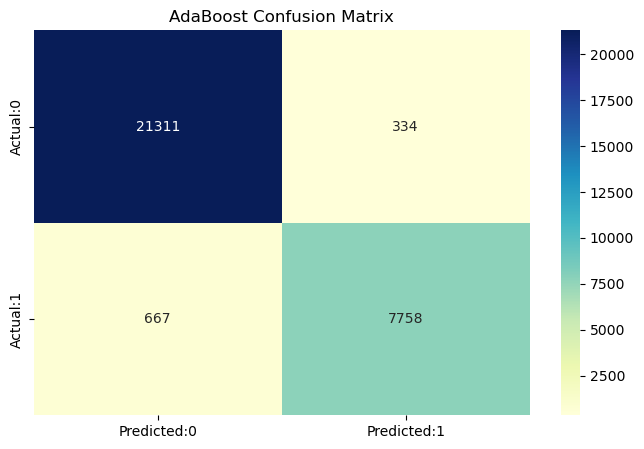


Confusion Matrix:
[[21311   334]
 [  667  7758]]


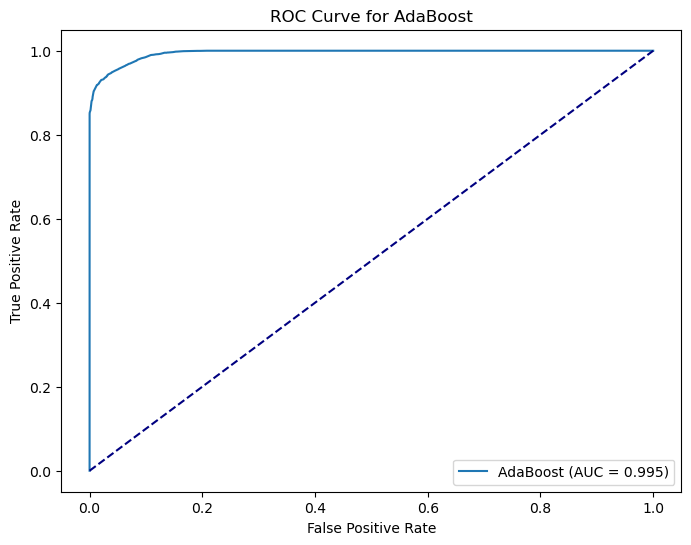

In [71]:
# Recall Score for train and test
train_recall_ada = recall_score(y_train, y_train_pred_ada)
test_recall_ada = recall_score(y_test, y_test_pred_ada)
print(f"recall for train data is {round(train_recall_ada, 3)}")
print(f"recall for test data is {round(test_recall_ada, 3)}")

#  precision of the model
train_precision_ada = round(precision_score(y_train, y_train_pred_ada), 3)
test_precision_ada = round(precision_score(y_test, y_test_pred_ada), 3)
print(f"precision for train data is {round(train_precision_ada, 3)}")
print(f"precision for test data is {round(test_precision_ada, 3)}")

#  accuracy of the model
train_accuracy_ada = accuracy_score(y_train, y_train_pred_ada)
test_accuracy_ada = accuracy_score(y_test, y_test_pred_ada)
print(f"accuracy for train data is {round(train_accuracy_ada, 3)}")
print(f"accuracy for test data is {round(test_accuracy_ada, 3)}")

# f1 score for AdaBoost
f1_ada = f1_score(y_test, y_test_pred_ada)
print(f'The f1 score is {round(f1_ada, 3)}')

# ROC curve and AUC
probs_ada = ada_model.predict_proba(x_test_encoded)
probs_ada = probs_ada[:, 1]  
auc_ada = roc_auc_score(y_test, probs_ada)
print(f"The AUC score is {round(auc_ada, 3)}.")


print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_ada))

#  Confusion Matrix
cm_ada = confusion_matrix(y_test, y_test_pred_ada)
conf_matrix_ada = pd.DataFrame(data=cm_ada, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap="YlGnBu")
plt.title('AdaBoost Confusion Matrix')
plt.show()


print("\nConfusion Matrix:")
print(cm_ada)

#  ROC curve
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, probs_ada)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (AUC = {round(auc_ada, 3)})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc='lower right')
plt.show()

# XGBoost Model

In [73]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train_encoded, y_train.values.ravel()) 

y_train_pred_xgb = xgb_model.predict(x_train_encoded)
y_test_pred_xgb = xgb_model.predict(x_test_encoded)

recall for train data is 0.934
recall for test data is 0.927
precision for train data is 0.978
precision for test data is 0.968
accuracy for train data is 0.976
accuracy for test data is 0.971
The f1 score is 0.947
The AUC score is 0.996.

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     21645
           1       0.97      0.93      0.95      8425

    accuracy                           0.97     30070
   macro avg       0.97      0.96      0.96     30070
weighted avg       0.97      0.97      0.97     30070



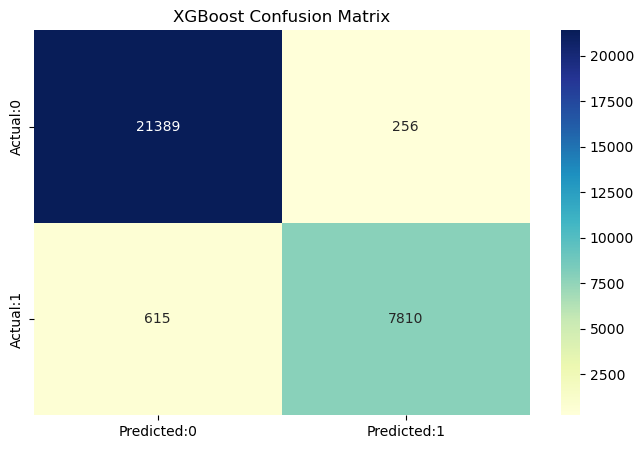


Confusion Matrix:
[[21389   256]
 [  615  7810]]


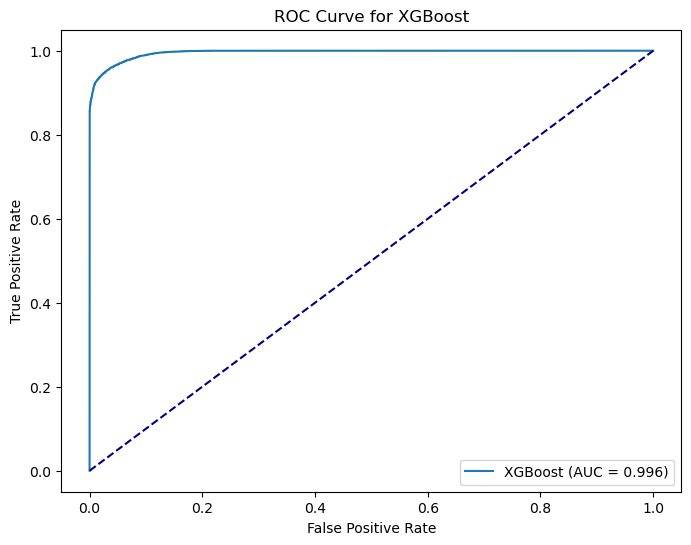

In [74]:
# Recall Score for train and test
train_recall_xgb = recall_score(y_train, y_train_pred_xgb)
test_recall_xgb = recall_score(y_test, y_test_pred_xgb)
print(f"recall for train data is {round(train_recall_xgb, 3)}")
print(f"recall for test data is {round(test_recall_xgb, 3)}")

# precision of the model
train_precision_xgb = round(precision_score(y_train, y_train_pred_xgb), 3)
test_precision_xgb = round(precision_score(y_test, y_test_pred_xgb), 3)
print(f"precision for train data is {round(train_precision_xgb, 3)}")
print(f"precision for test data is {round(test_precision_xgb, 3)}")

#accuracy of the model
train_accuracy_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"accuracy for train data is {round(train_accuracy_xgb, 3)}")
print(f"accuracy for test data is {round(test_accuracy_xgb, 3)}")

# f1 score for XGBoost
f1_xgb = f1_score(y_test, y_test_pred_xgb)
print(f'The f1 score is {round(f1_xgb, 3)}')

# ROC curve and AUC
probs_xgb = xgb_model.predict_proba(x_test_encoded)
probs_xgb = probs_xgb[:, 1]  
auc_xgb = roc_auc_score(y_test, probs_xgb)
print(f"The AUC score is {round(auc_xgb, 3)}.")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
conf_matrix_xgb = pd.DataFrame(data=cm_xgb, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap="YlGnBu")
plt.title('XGBoost Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(cm_xgb)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, probs_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {round(auc_xgb, 3)})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc='lower right')
plt.show()

In [75]:
import pickle

In [76]:
with open('ada_model.pkl', 'wb') as f:
    pickle.dump(ada_model, f)

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

with open('dt_model.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

### 8. Feature Importance
- Identifying the most important features for predicting business validation.
Descision Trees

Feature Importance Decision Trees.

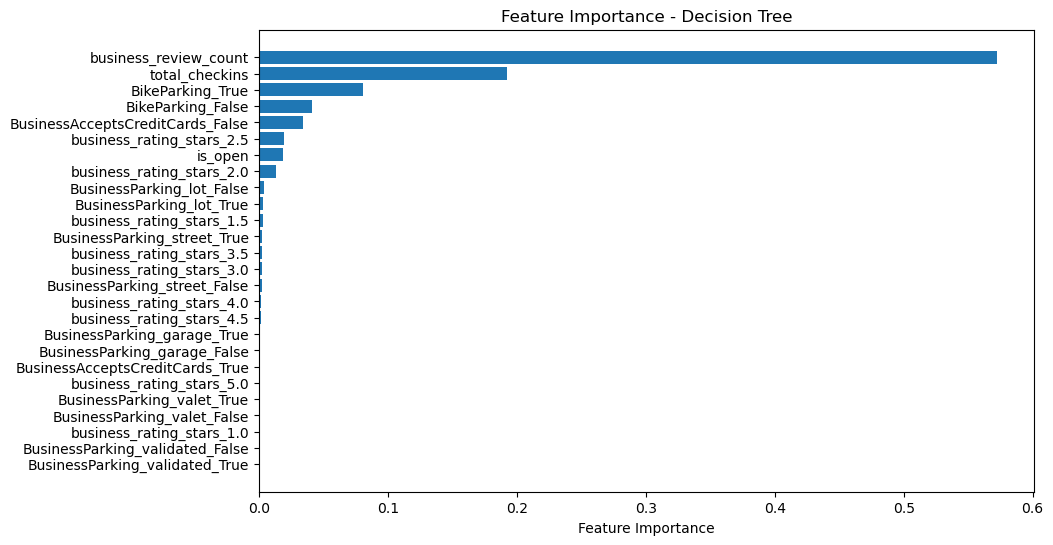

Top features based on importance in Decision Tree:
                             Feature  Importance
0              business_review_count    0.572307
1                     total_checkins    0.192179
16                  BikeParking_True    0.080383
15                 BikeParking_False    0.041258
3   BusinessAcceptsCreditCards_False    0.034029


In [78]:
dt_feature_importance = dt_model.feature_importances_


dt_importance_df = pd.DataFrame({
    'Feature': x_train_encoded.columns,  
    'Importance': dt_feature_importance
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(dt_importance_df['Feature'], dt_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Decision Tree')

plt.gca().invert_yaxis()  
plt.show()


print("Top features based on importance in Decision Tree:")
print(dt_importance_df.head())


The feature importance score gives the measure of decrese in impurity when a feature is used for splitting the data. Every time the tree makes a split on a feature, the algorithm calculates how much that feature reduces the impurity in the dataset. The feature importance score is the average reduction in impurity across all trees in the Random Forest model.

A higher score means that the feature plays a more important role in the model's predictions and viceversa.

1. business_review_count:
This feature has the highest importance score 57.2%, meaning it has the largest impact on the Decision Tree model's ability to classify whether a business is validated or not.
This high score suggests that the number of reviews a business has is a strong indicator of its validation status, which makes sense because businesses with more reviews are often more established and likely to be validated.
2. total_checkins:
This is the second most important feature, accounting for 19.2% of the importance.
This feature indicates customer activity and engagement, which is important for determining whether a business is validated. Active businesses are more likely to be validated.



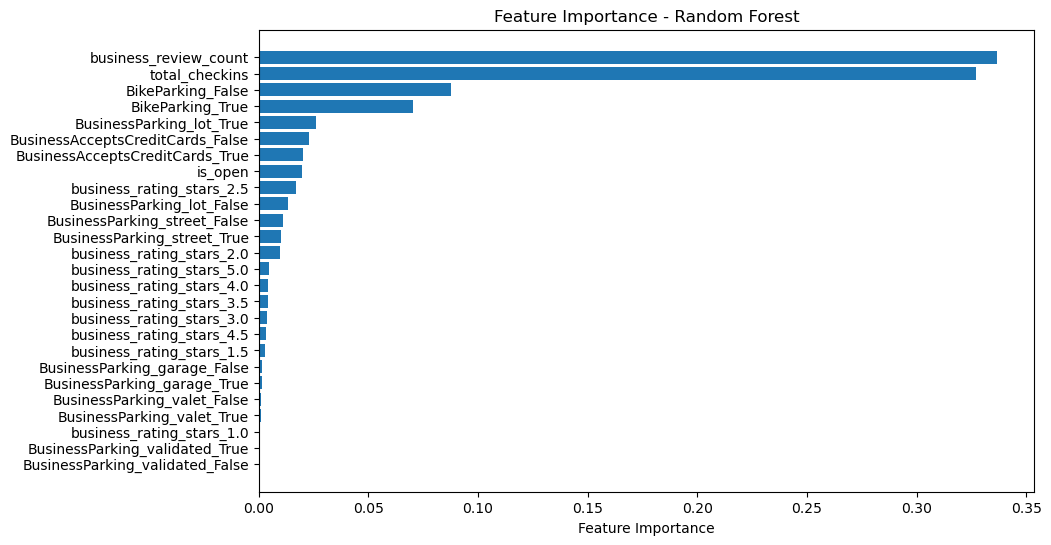

Top features based on importance in Random Forest:
                     Feature  Importance
0      business_review_count    0.336684
1             total_checkins    0.327280
15         BikeParking_False    0.087661
16          BikeParking_True    0.070207
12  BusinessParking_lot_True    0.026135


In [79]:

import matplotlib.pyplot as plt

# feature importance from the Random Forest model
rf_feature_importance = rf_model.feature_importances_


rf_importance_df = pd.DataFrame({
    'Feature': x_train_encoded.columns,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis() 
plt.show()

#
print("Top features based on importance in Random Forest:")
print(rf_importance_df.head())


The feature importance score gives the measure of decrese in impurity when a feature is used for splitting the data. Every time the tree makes a split on a feature, the algorithm calculates how much that feature reduces the impurity in the dataset. The feature importance score is the average reduction in impurity across all trees in the Random Forest model.

A higher score means that the feature plays a more important role in the model's predictions and viceversa.

# Intrepretation

business_review_count accounts for 33.6% of the importance in the model, while total_checkins accounts for 32.7%.

1. Higher number of reviews indicates that a business is more popular. Businesses are more likely to be validated because they have more visibility and customer interaction.

2. Frequent check-ins suggest high customer traffic, which means that the business is popular, high traffic of customers and well established.
3. While the presence or absence of bike parking may not directly indicate validation, it could be an indirect indicator of the business’s type, location, or customer base.



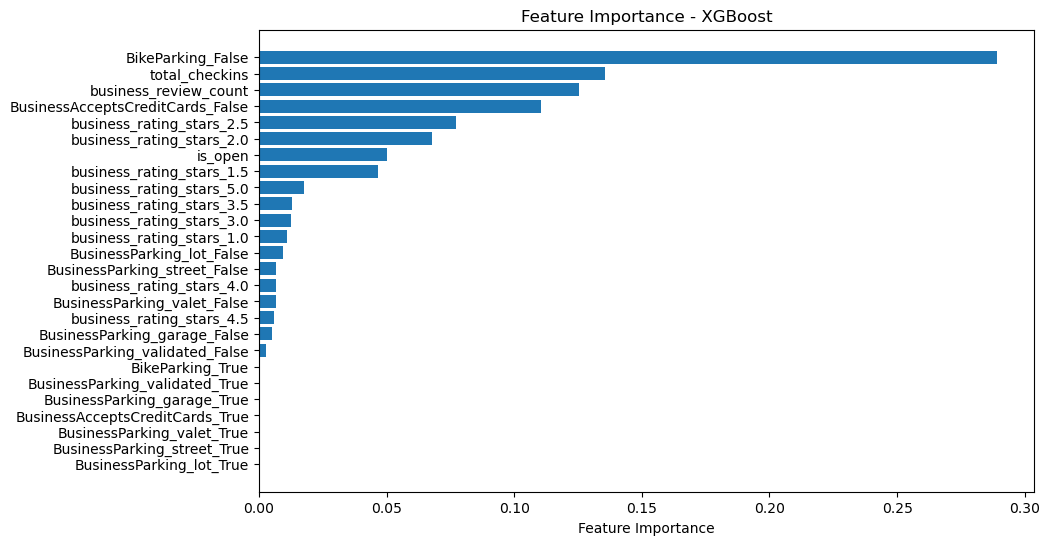

Top features based on importance in XGBoost:
                             Feature  Importance
15                 BikeParking_False    0.289095
1                     total_checkins    0.135587
0              business_review_count    0.125345
3   BusinessAcceptsCreditCards_False    0.110418
20         business_rating_stars_2.5    0.077040


In [80]:
# feature importance from the XGBoost model
xgb_feature_importance = xgb_model.feature_importances_

xgb_importance_df = pd.DataFrame({
    'Feature': x_train_encoded.columns,
    'Importance': xgb_feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()  
plt.show()

print("Top features based on importance in XGBoost:")
print(xgb_importance_df.head())


# Lime and Shap Comparison

# Hyperparameter Tuning